<a href="https://colab.research.google.com/github/nightrainlily/powergrid/blob/main/us_power_grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
import pprint
import collections
pp = pprint.PrettyPrinter(indent=4)
%matplotlib inline

In [ ]:
edges = np.loadtxt("edges.txt")


In [ ]:
G = nx.Graph()
for row in edges:
    G.add_edge(row[0], row[1], weight=row[2])
num_nodes, num_edges = G.number_of_nodes(), G.number_of_edges()
print("Number of nodes: ", num_nodes, "\nNumber of edges: ", num_edges)

Number of nodes:  4941 
Number of edges:  6594



#### (a)
This is most similar to the unweighted networks we worked with in class (nodes are power sources and links are transmission lines). transmission line capacity data is not included; no weights.

<BarContainer object of 16 artists>

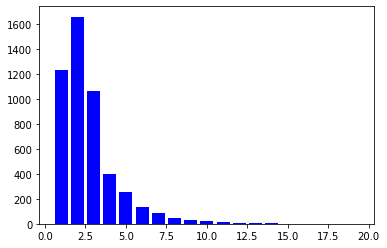

In [ ]:
# (b) plot distribution of a property of links and nodes
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

In [ ]:
# clustering coefficient
cc = nx.average_clustering(G)
print("Cluster Coefficient: ", cc)

Cluster Coefficient:  0.08010361108159712


In [ ]:
# shortest path lengths
lengths = nx.shortest_path_length(G, weight='weight')
st_length = {}
max_len = 0
for key in lengths:
  ll = key
  i = max(ll[1].values())
  st_length[ll[0]] = i
  if i > max_len:
    max_len = i
  print("For", ll[0], " max length is ", i)

For 1.0  max length is  27.0
For 387.0  max length is  28.0
For 396.0  max length is  26.0
For 452.0  max length is  28.0
For 2.0  max length is  40.0
For 3554.0  max length is  41.0
For 3587.0  max length is  39.0
For 3588.0  max length is  39.0
For 3638.0  max length is  41.0
For 3.0  max length is  43.0
For 3584.0  max length is  42.0
For 4.0  max length is  40.0
For 4931.0  max length is  39.0
For 5.0  max length is  37.0
For 89.0  max length is  36.0
For 6.0  max length is  39.0
For 14.0  max length is  38.0
For 121.0  max length is  40.0
For 7.0  max length is  35.0
For 9.0  max length is  34.0
For 8.0  max length is  35.0
For 10.0  max length is  33.0
For 11.0  max length is  34.0
For 62.0  max length is  34.0
For 76.0  max length is  34.0
For 206.0  max length is  32.0
For 209.0  max length is  34.0
For 51.0  max length is  33.0
For 12.0  max length is  35.0
For 95.0  max length is  34.0
For 126.0  max length is  34.0
For 13.0  max length is  39.0
For 15.0  max length is  39.0


In [ ]:
mean_spl = np.mean(list(st_length.values()))
print("Mean shortest path length: ", mean_spl)

Mean shortest path length:  34.54078121837685


In [ ]:
print("Maximum length in network: ", max_len)

Maximum length in network:  46.0


## (c) Is the network a small world?
The network is not a small world because it has a low cluster coefficient and the mean shortest path length is relatively low.

In [ ]:
pos = nx.spring_layout(G)

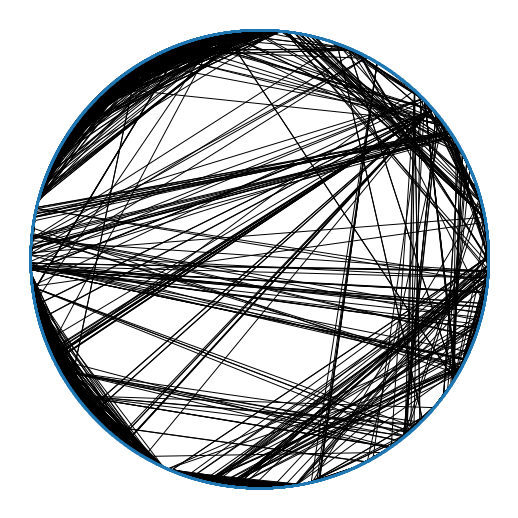

In [ ]:
# (d) display image of network
plt.figure(2, figsize=(7,7))
nx.draw_circular(G, node_size=2)

In [ ]:
dc = nx.degree_centrality(G)

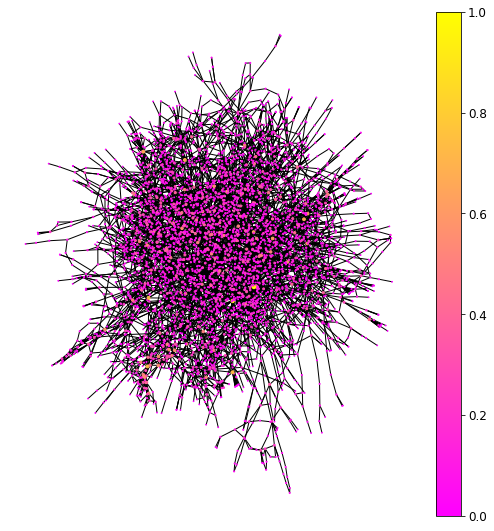

In [ ]:
# (e) second set of properties
# Degree centrality

plt.figure(2, figsize=(7,7))
nx.draw(G,
          pos,
          nodelist=list(dc.keys()),
          node_size = [d*3000 for d in list(dc.values())],
          node_color=list(dc.values()),
          font_size=8,
          cmap='spring',
          )
sm = plt.cm.ScalarMappable(cmap='spring')
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=12)

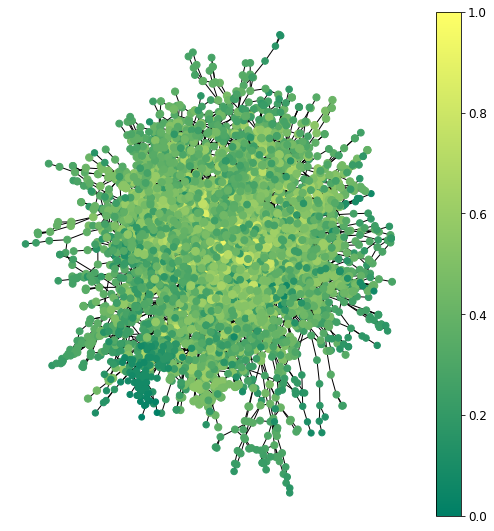

In [ ]:
# (e) plot second set of properties
# Closeness centrality
cl = nx.closeness_centrality(G)
plt.figure(1, figsize=(7,7))
nx.draw(G,
          pos,
          nodelist=list(cl.keys()),
          node_size = [d*1000 for d in list(cl.values())],
          node_color=list(cl.values()),
          font_size=8,
          cmap='summer',
          )
sm = plt.cm.ScalarMappable(cmap='summer')
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=12)

In [ ]:
pos = nx.spring_layout(G)

## (e) analyze second set of properties


The closeness centrality is the measure of how close a node is to all the other nodes.
The degree centrality is the fraction of nodes the incoming edges are connected to.
The closeness centrality shows that most nodes are of low closeness and low degree centrality.
This means that the generators/sources are of low centrality generally.

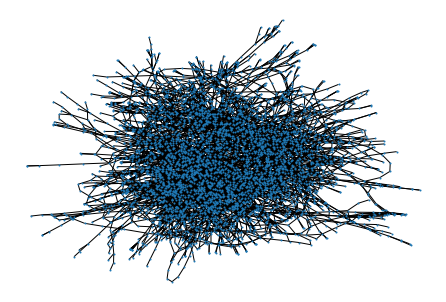

In [ ]:
nx.draw(G, pos, node_size=1)

Text(0, 0.5, 'Number of Nodes')

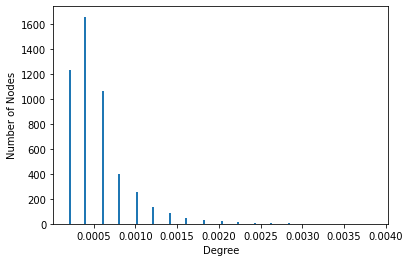

In [ ]:
# Degree Distribution
_ = plt.hist(dc.values(), 'auto')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

In [ ]:
bc = nx.betweenness_centrality(G)

Text(0, 0.5, 'Number of Nodes')

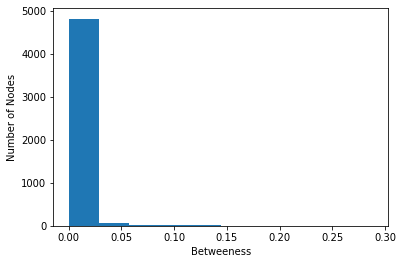

In [ ]:
# Betweeness Centrality
_ = plt.hist(bc.values())
plt.xlabel('Betweeness')
plt.ylabel('Number of Nodes')

Text(0, 0.5, 'Number of Nodes')

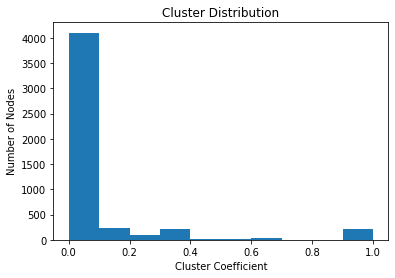

In [ ]:
# clustering distribution
cl = _ = nx.clustering(G)
_ = plt.hist(cl.values())
plt.title("Cluster Distribution")
plt.xlabel('Cluster Coefficient')
plt.ylabel('Number of Nodes')

Text(0, 0.5, 'Degree')

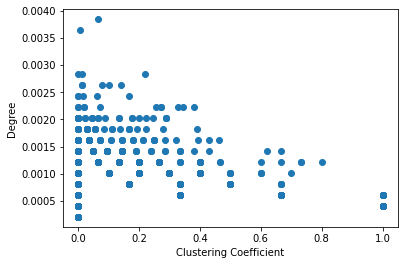

In [ ]:
plt.scatter(cl.values(), dc.values())
plt.xlabel('Clustering Coefficient')
plt.ylabel('Degree')

In [ ]:
# minimum spanning tree
mt = nx.minimum_spanning_tree(G)


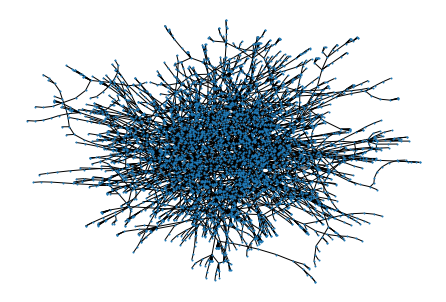

In [ ]:
pos = nx.spring_layout(mt)
nx.draw(mt, pos, node_size=1)

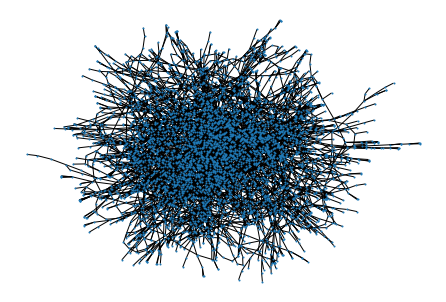

In [ ]:
# removing edge

G.remove_edge(10, 206)

pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=1)
